# Homework2
Database of diabetes test. Using Gaussian Naive Bayes I will try to predict if someone is healthy or diabetic

In [6]:
import numpy as np
import pandas as pd
data = pd.read_csv("pima-indians-diabetes.data.csv", header=None)
from sklearn.model_selection import train_test_split
data.head(10)

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [7]:
X_train,X_test,y_train,y_test = train_test_split(data.as_matrix(columns=data.columns[0:-1]),data[8], test_size = 0.2, random_state=1)

In [8]:
import math

def mean(vector):
    return sum(vector)/float(len(vector))

def stdev(vector):
    return np.sqrt(sum([pow(x-mean(vector),2) for x in vector])/float(len(vector)-1))

def summarize(dataset):
    summary = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
    return summary
#gaussian
def calculateProbability(x, mean, stdev):
    licznik= -1*(math.pow(x-mean,2))
    dzielnik=2*math.pow(stdev,2)
    exponent = math.exp(licznik/dzielnik)
    if stdev == 0:
        print("stdev is 0")
        print (x,mean,stdev)
    if licznik == 0:
        print("licznik is 0")
        print(x,mean,stdev)
    return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent

def classProbability(sumary,data):
    classProbabilityMap = dict()
    for className,summary in sumary.items():
        classProbabilityMap[className] = 1
        for i in range(len(summary)):
            m, s = summary[i]
            x = data[i]
            classProbabilityMap[className] *= calculateProbability(x, m ,s)
    return classProbabilityMap

def predict(summaries, inputVector):
    probabilities = classProbability(summaries, inputVector)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    #print('Prediction: '+str(bestLabel))
    return bestLabel

def getPredictions(summaries, testSet):
    predictions = []
    for i in range(len(testSet)):
        result = predict(summaries, testSet[i])
        predictions.append(result)
    return predictions

In [9]:
summaries = {'A':[(1, 0.5)], 'B':[(20, 5.0)]}
inputVector = [1.1, '?']
result = predict(summaries, inputVector)
print('Prediction: '+str(result))

Prediction: A


In [10]:
byClass = dict()
for i,j in zip(X_train,y_train):
    if j not in byClass:
        byClass[j] = []
    byClass[j].append(i)

summaries = dict()
summaries[0] = summarize(byClass[0])
summaries[1] = summarize(byClass[1])
predictions = getPredictions(summaries,X_test)

#print(predictions)

In [11]:
from sklearn.metrics import confusion_matrix,precision_score, recall_score,accuracy_score,f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
conf_mat = confusion_matrix(y_test, predictions)
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')
# conf_mat

In [12]:
print(classification_report(y_test, predictions, target_names = ["healthy", "diabetic"]))


             precision    recall  f1-score   support

    healthy       0.82      0.82      0.82        99
   diabetic       0.67      0.67      0.67        55

avg / total       0.77      0.77      0.77       154



             precision    recall  f1-score   support

    healthy       0.80      0.86      0.83        99
   diabetic       0.71      0.62      0.66        55

avg / total       0.77      0.77      0.77       154



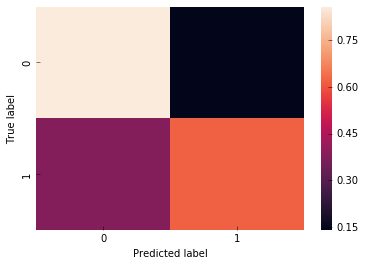

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,precision_score, recall_score,accuracy_score,f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
model = GaussianNB()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test, predictions, target_names = ["healthy", "diabetic"]))
conf_mat = confusion_matrix(y_test, predictions)
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')

             precision    recall  f1-score   support

    healthy       0.78      0.91      0.84        99
   diabetic       0.76      0.53      0.62        55

avg / total       0.77      0.77      0.76       154



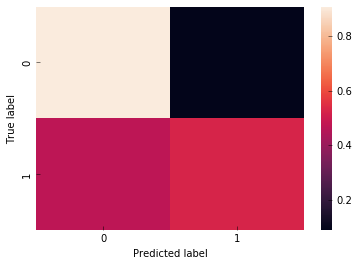

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test, predictions, target_names = ["healthy", "diabetic"]))
conf_mat = confusion_matrix(y_test, predictions)
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [26]:
def czekanowski_dice_index(matrix):
    TP = matrix[1,1]
    FP = matrix[0,1]
    FN = matrix[1,0]
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    return 2*precision*recall/(precision+recall)

In [27]:
czekanowski_dice_index(conf_mat)

0.6236559139784946